In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

Load the MNIST dataset

In [30]:
# Load data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [4 6 8 7 0 1 2 9 0 3]


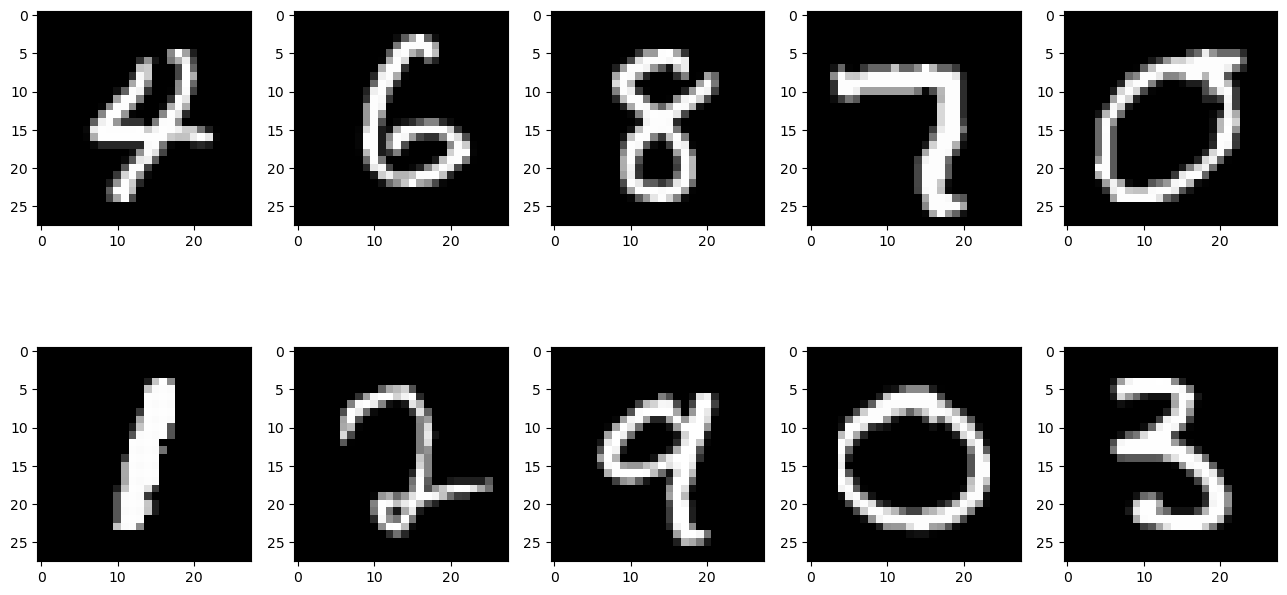

In [31]:
# Visualize random samples
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ', train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]], cmap='gray')
plt.show()

Pre-processing stage

In [32]:
# Normalize images and one-hot encode labels
new_train_data = train_data / 255.0
new_test_data = test_data / 255.0
new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [33]:
# Create model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    Dense(64, activation='relu', kernel_regularizer=l1(0.01)),   # L1 regularization
    Dense(10, activation='softmax')
])


In [35]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
# Show model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Train model

In [37]:
# Train model
train_info = model.fit(new_train_data, new_train_target, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7959 - loss: 3.8914 - val_accuracy: 0.9030 - val_loss: 0.8984
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8952 - loss: 0.8663 - val_accuracy: 0.9085 - val_loss: 0.7103
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9041 - loss: 0.7050 - val_accuracy: 0.9128 - val_loss: 0.6206
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9035 - loss: 0.6404 - val_accuracy: 0.9148 - val_loss: 0.5851
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9095 - loss: 0.5983 - val_accuracy: 0.9176 - val_loss: 0.5637
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9102 - loss: 0.5758 - val_accuracy: 0.9186 - val_loss: 0.5496
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9139 - loss: 0.5540 - val_accuracy: 0.9200 - val_loss: 0.5296
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9162 - loss: 0.5334 - val_accuracy: 0.

Plot loss and accuracy

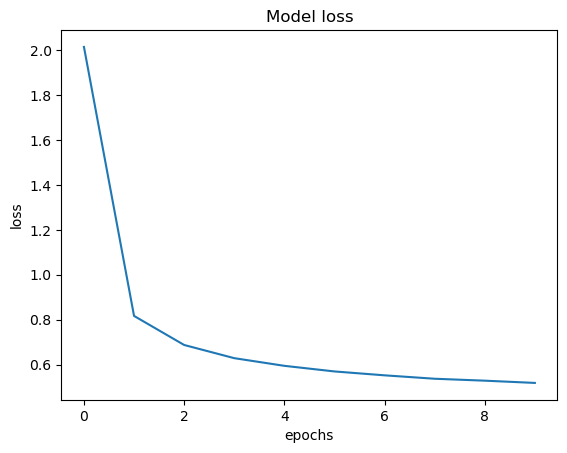

In [38]:
# Plot loss and accuracy
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

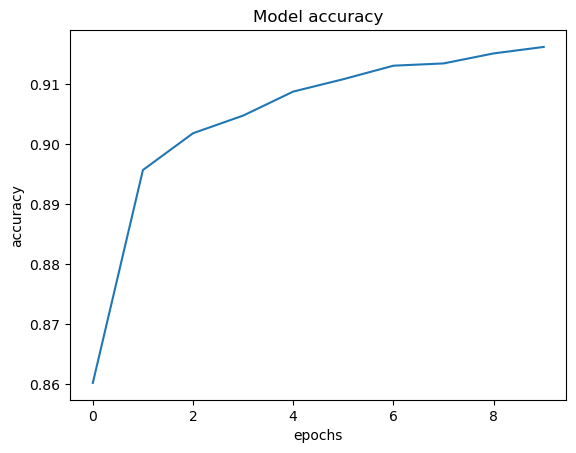

In [39]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Evaluate model

In [40]:
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9095 - loss: 0.5406
Loss of the Test dataset is: 0.5030770301818848
Accuracy of the test dataset is: 0.9204000234603882


Predict and create confusion matrix

In [41]:
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(new_test_target, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


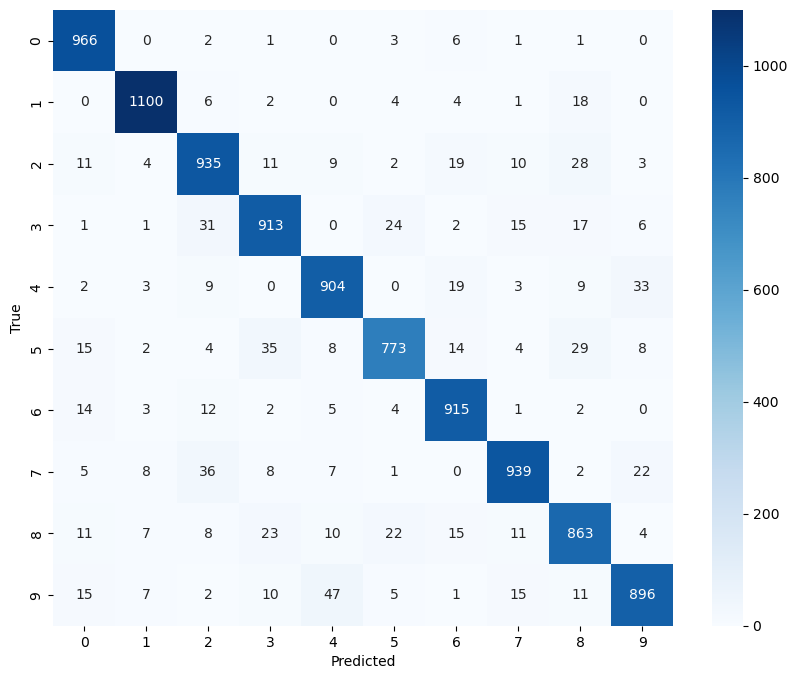

In [42]:
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Save the model weights

In [43]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')